In [188]:
# data science
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# image
from matplotlib import image

# API
import requests
import json

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [38]:
df = pd.read_csv('AQI_clean.csv')
df.sort_values(by = "aqi_value", ascending = True)

,country,city,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2_5_aqi_value,pm2_5_aqi_category,latitude,longitude
6488,Ecuador,Macas,7,Good,1,Good,7,Good,0,Good,7,Good,-2.3667,-78.1333
16259,Papua New Guinea,Tari,8,Good,0,Good,8,Good,0,Good,7,Good,-5.8489,142.9506
10305,Ecuador,Azogues,8,Good,0,Good,7,Good,0,Good,8,Good,-2.7333,-78.8333
5350,Peru,Huaraz,9,Good,0,Good,9,Good,0,Good,8,Good,-9.5333,-77.5333
5549,Peru,Huancavelica,10,Good,0,Good,2,Good,1,Good,10,Good,-12.7864,-74.9756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7374,India,Maur,500,Hazardous,1,Good,62,Moderate,1,Good,433,Hazardous,30.0833,75.2500
7375,India,Maur,500,Hazardous,1,Good,62,Moderate,1,Good,433,Hazardous,47.3417,8.6703
13825,India,Ratangarh,500,Hazardous,0,Good,37,Good,0,Good,471,Hazardous,24.8167,75.1167
5816,India,Sardulgarh,500,Hazardous,1,Good,40,Good,1,Good,500,Hazardous,29.6970,75.2388


In [7]:
engine = create_engine("sqlite:///aqi.sqlite")

In [9]:
# query = """CREATE TABLE "aqi" (
# 	"id" integer Primary key,
# 	"country" varchar(100),
# 	"city" varchar(100),
# 	"aqi_value" integer,
# 	"aqi_category" varchar(30),
# 	"co_aqi_value" integer,
# 	"co_aqi_category" varchar(30),
# 	"ozone_aqi_value" integer,
# 	"ozone_aqi_category" varchar(30),
# 	"no2_aqi_value" integer,
# 	"no2_aqi_category" varchar(30),
# 	"pm2.5_aqi_value" integer,
# 	"pm2.5_aqi_category" varchar(30),
# 	"latitude" float,
# 	"longitude" float
# );"""

# with engine.connect() as conn:
#     conn.execute(text(query))

In [ ]:
#df.to_sql("aqi", con=engine, index=False, method="multi", if_exists="append")

In [10]:
 # INSPECT to confirm existence

# Create the inspector and connect it to the engine
inspector_gadget = inspect(engine)

# Collect the names of tables within the database
tables = inspector_gadget.get_table_names()

# print metadata for each table
for table in tables:
    print(table)
    print("-----------")
    
    # get columns
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print() 

aqi
-----------
id INTEGER
country VARCHAR(100)
city VARCHAR(100)
aqi_value INTEGER
aqi_category VARCHAR(30)
co_aqi_value INTEGER
co_aqi_category VARCHAR(30)
ozone_aqi_value INTEGER
ozone_aqi_category VARCHAR(30)
no2_aqi_value INTEGER
no2_aqi_category VARCHAR(30)
pm2.5_aqi_value INTEGER
pm2.5_aqi_category VARCHAR(30)
latitude FLOAT
longitude FLOAT



In [17]:
# USER SELECTED COUNTRY, RETURNS TOP 10 CITIES, HIGHEST TO LOWEST AQI
user_input = "All"

if user_input == "All":
    where_clause = ""
else:
    where_clause = f"WHERE country = '{user_input}'"

query = f"""
    SELECT 
        country,
        city,
        aqi_value,
        aqi_category
    FROM 
        aqi
    {where_clause}
    ORDER BY
        aqi_value DESC
    LIMIT
        10; 
"""

df2 = pd.read_sql(text(query), con=engine)
df2.head(20)

,id,country,city,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category,latitude,longitude
0,11106,Brazil,Suzano,247,Very Unhealthy,16,Good,0,Good,46,Good,247,Very Unhealthy,-23.5428,-46.3108
1,11002,Brazil,Guarulhos,217,Very Unhealthy,13,Good,0,Good,39,Good,217,Very Unhealthy,-23.4628,-46.5328
2,2508,Brazil,Itaquaquecetuba,172,Unhealthy,7,Good,0,Good,22,Good,172,Unhealthy,-23.4864,-46.3486
3,7828,Brazil,Mendes,172,Unhealthy,8,Good,1,Good,17,Good,172,Unhealthy,-22.5269,-43.7328
4,2948,Brazil,Barueri,170,Unhealthy,6,Good,1,Good,20,Good,170,Unhealthy,-23.5111,-46.8764
5,395,Brazil,Francisco Morato,169,Unhealthy,7,Good,0,Good,21,Good,169,Unhealthy,-23.2817,-46.7425
6,10734,Brazil,Cotia,169,Unhealthy,6,Good,1,Good,20,Good,169,Unhealthy,-23.6042,-46.9194
7,2958,Brazil,Caieiras,165,Unhealthy,6,Good,1,Good,19,Good,165,Unhealthy,-23.3644,-46.7408
8,11389,Brazil,Palmas,163,Unhealthy,6,Good,4,Good,3,Good,163,Unhealthy,-10.1844,-48.3336
9,11390,Brazil,Palmas,163,Unhealthy,6,Good,4,Good,3,Good,163,Unhealthy,-26.4839,-51.9908


In [114]:
# USER SELECTED COUNTRY, RETURNS TOP 10 CITIES, LOWEST TO HIGHEST AQI
query = """
    SELECT 
        *
    FROM 
        aqi
    WHERE
        aqi_value = 500;
    
"""

df2 = pd.read_sql(text(query), con=engine)
df2.head(20)

,id,country,city,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category,latitude,longitude
0,204,Pakistan,Bahawalnagar,500,Hazardous,1,Good,38,Good,1,Good,466,Hazardous,29.9928,73.2536
1,445,Pakistan,Harunabad,500,Hazardous,1,Good,43,Good,0,Good,443,Hazardous,29.6130,73.1409
2,577,India,Mahendragarh,500,Hazardous,1,Good,42,Good,0,Good,435,Hazardous,28.2800,76.1500
3,1603,India,Phalodi,500,Hazardous,0,Good,34,Good,0,Good,467,Hazardous,27.1310,72.3640
4,1770,India,Jodhpur,500,Hazardous,0,Good,34,Good,0,Good,378,Hazardous,26.2800,73.0200
5,3679,India,Delhi,500,Hazardous,1,Good,44,Good,2,Good,446,Hazardous,28.6100,77.2300
6,3680,India,Delhi,500,Hazardous,1,Good,44,Good,2,Good,446,Hazardous,37.4306,-120.7759
7,3697,United States of America,Durango,500,Hazardous,133,Unhealthy for Sensitive Groups,0,Good,53,Moderate,500,Hazardous,24.0250,-104.6675
8,3698,United States of America,Durango,500,Hazardous,133,Unhealthy for Sensitive Groups,0,Good,53,Moderate,500,Hazardous,43.1689,-2.6300
9,3699,United States of America,Durango,500,Hazardous,133,Unhealthy for Sensitive Groups,0,Good,53,Moderate,500,Hazardous,37.2659,-107.8781


In [124]:
# USER SELECTED COUNTRY AND AQI CATEGORY, RETURNS TOP 10 CITIES, LOWEST TO HIGHEST AQI
query = """
    SELECT 
        *
    FROM 
        aqi
    WHERE 
        country = "Brazil"
    ORDER BY
        aqi_value DESC;
    
"""

df2 = pd.read_sql(text(query), con=engine)
df2.head(20)


,id,country,city,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category,latitude,longitude
0,11106,Brazil,Suzano,247,Very Unhealthy,16,Good,0,Good,46,Good,247,Very Unhealthy,-23.5428,-46.3108
1,11002,Brazil,Guarulhos,217,Very Unhealthy,13,Good,0,Good,39,Good,217,Very Unhealthy,-23.4628,-46.5328
2,2508,Brazil,Itaquaquecetuba,172,Unhealthy,7,Good,0,Good,22,Good,172,Unhealthy,-23.4864,-46.3486
3,7828,Brazil,Mendes,172,Unhealthy,8,Good,1,Good,17,Good,172,Unhealthy,-22.5269,-43.7328
4,2948,Brazil,Barueri,170,Unhealthy,6,Good,1,Good,20,Good,170,Unhealthy,-23.5111,-46.8764
5,395,Brazil,Francisco Morato,169,Unhealthy,7,Good,0,Good,21,Good,169,Unhealthy,-23.2817,-46.7425
6,10734,Brazil,Cotia,169,Unhealthy,6,Good,1,Good,20,Good,169,Unhealthy,-23.6042,-46.9194
7,2958,Brazil,Caieiras,165,Unhealthy,6,Good,1,Good,19,Good,165,Unhealthy,-23.3644,-46.7408
8,11389,Brazil,Palmas,163,Unhealthy,6,Good,4,Good,3,Good,163,Unhealthy,-10.1844,-48.3336
9,11390,Brazil,Palmas,163,Unhealthy,6,Good,4,Good,3,Good,163,Unhealthy,-26.4839,-51.9908


In [121]:
file = "../aqi_category_background.png"
background = image.imread(file)

print(background)
print(background.shape)

[[[0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  ...
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]]

 [[0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  ...
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]]

 [[0.6        0.6        0.6        0.01960784]
  [0.5882353  0.61960787 0.6666667  0.24705882]
  [0.5882353  0.61960787 0.6666667  0.24705882]
  ...
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]]

 ...

 [[0.         0.33333334 0.6666667  0.01176471]
  [0.         0.41960785 0.80784315 0.12156863]
  [0.     

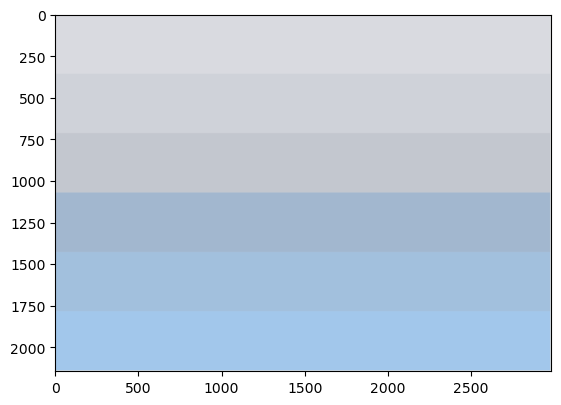

In [122]:
plt.imshow(background)
plt.show()

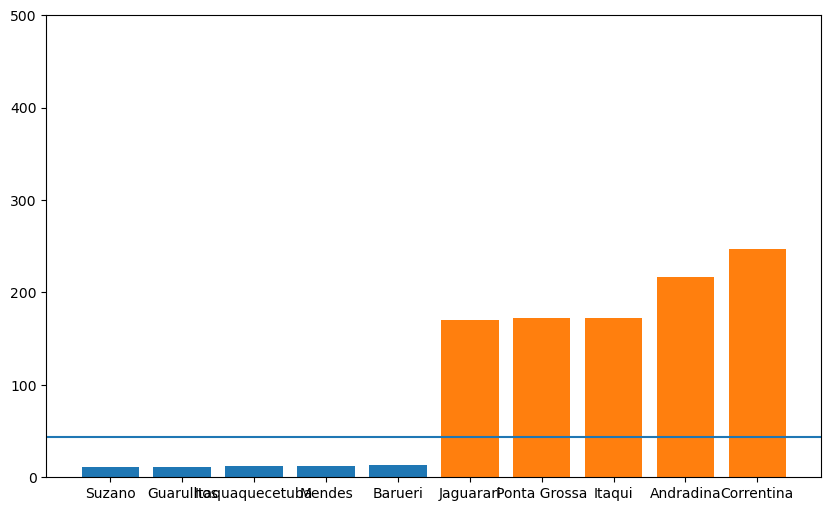

In [207]:
# Get data values for bar chart
country_avg = df2.aqi_value.mean()
sorted_aqi_values = df2.aqi_value.sort_values(ascending=True)
top_5_values = sorted_aqi_values[:5]
bottom_5_values = sorted_aqi_values[-5:]

# Set figure size
fig, ax = plt.subplots(figsize=(10,6))

# Create the bar chart
bar1 = ax.bar(df2.city[:5], top_5_values)
bar2 = ax.bar(df2.city[-5:], bottom_5_values)

# Add a horizontal average line
avg = ax.axhline(y=np.mean(df2.aqi_value))

# Set ylimit to 500 (max aqi_value)
ax.set_ylim([0, 500])

plt.show()

In [12]:
 # Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

# Print all of the classes mapped to the Base

print(list(Base.classes))

[<class 'sqlalchemy.ext.automap.aqi'>]
